# **Install Required Libraries**

In [ ]:
!pip install transformers datasets sentence-transformers -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# **Import Python Libraries**

In [ ]:
import pandas as pd
import numpy as np
import torch
import transformers
from transformers import (AutoTokenizer, AutoModelForSequenceClassification,
                           Trainer, TrainingArguments, DataCollatorWithPadding)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from datasets import Dataset
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import transformers
print(transformers.__version__)


4.51.3


In [ ]:
# --- 2. LOAD DATASET ---
file_path = '/content/drive/MyDrive/Social Media Mining/FInal Project/Data/Reddit- Posts.csv'  # Update path if different

# Columns overview
df = pd.read_csv(file_path)
print(df.columns)
df.head()

Index(['post_id', 'url', 'user_posted', 'title', 'description', 'num_comments',
       'date_posted', 'community_name', 'num_upvotes', 'photos', 'videos',
       'tag', 'related_posts', 'comments', 'community_url',
       'community_description', 'community_members_num', 'community_rank'],
      dtype='object')


,post_id,url,user_posted,title,description,num_comments,date_posted,community_name,num_upvotes,photos,videos,tag,related_posts,comments,community_url,community_description,community_members_num,community_rank
0,t3_1cahpjv,https://www.reddit.com/r/Jewish/comments/1cahp...,Nyarlathotep451,Going back to 1936,This year we are using the traditional Maxwell...,3,"""2024-04-22T18:07:35.993Z""",Jewish,45,"[""https://i.redd.it/3rugbizsm2wc1.jpeg""]",NaN,Jewish Joy! 😊,"[{""community"":""jewish"",""community_url"":""https:...","[{""comment"":""I really like the illustration st...",https://www.reddit.com/r/Jewish/,r/Jewish is a subreddit devoted to all things ...,67325,"{""community_rank_type"":""Rank by size"",""communi..."
1,t3_179ktwv,https://www.reddit.com/r/brasilivre/comments/1...,muks_too,Discussão genérica sobre anarcocapitalismo,Com o aumento significativo de aderência ao an...,4,"""2023-10-17T00:03:58.511Z""",brasilivre,4,NaN,NaN,BATEPAPO 💬,"[{""community"":""brasilivre"",""community_url"":""ht...","[{""comment"":""\""São 0 anarquistas no Brasil, o ...",https://www.reddit.com/r/brasilivre/,O subreddit brasileiro mais livre do reddit. N...,220142,"{""community_rank_type"":null,""community_rank_va..."
2,t3_1gfqjin,https://www.reddit.com/r/brasilivre/comments/1...,Zinho3311,Gilmar Mendes anula condenação de Zé Dirceu (P...,Cada vez mais eu vejo esse país andando para t...,32,"""2024-10-30T16:22:02.139Z""",brasilivre,54,NaN,NaN,corrupcao,"[{""community"":""carros"",""community_url"":""https:...","[{""comment"":""\""Aí nós vamos tomar o poder, que...",https://www.reddit.com/r/brasilivre/,O subreddit brasileiro mais livre do reddit. N...,220142,"{""community_rank_type"":null,""community_rank_va..."
3,t3_12o7eaj,https://www.reddit.com/r/amcstock/comments/12o...,robotwizard_9009,"I have evidence that Robinhood, w/ Jump Tradin...","I have evidence that Robinhood, w/ Jump Tradin...",514,"""2023-04-16T12:48:12.676Z""",amcstock,5701,NaN,NaN,DD (Due Diligence) 🧠,"[{""community"":""trading"",""community_url"":""https...","[{""comment"":""This explains his GM# tweet!"",""da...",https://www.reddit.com/r/amcstock/,The Official AMC Stock Subreddit,525802,"{""community_rank_type"":""Rank by size"",""communi..."
4,t3_1818336,https://www.reddit.com/r/brasil/comments/18183...,[deleted],"O ""patriota"" brasileiro está vivendo um inferno",O patriotismo bolsonarista se apoia(va) em trê...,190,"""2023-11-22T12:33:26.294Z""",brasil,410,NaN,NaN,Discussão,"[{""community"":""coronabr"",""community_url"":""http...","[{""comment"":""Pelo menos estao do lado certo"",""...",https://www.reddit.com/r/brasil/,A casa dos brasileiros no Reddit. Leia as regr...,2340849,"{""community_rank_type"":null,""community_rank_va..."


# **Load Dataset**

In [ ]:
df['engagement_score'] = df['num_upvotes'] + 0.5 * df['num_comments']


# **Text Preprocessing**

In [ ]:
# --- 3. TEXT PREPROCESSING (Using Huggingface Tokenizer cleaning) ---

# Merge any title + description if applicable
if 'title' in df.columns and 'description' in df.columns:
    df['text'] = df['title'].fillna('') + ' ' + df['description'].fillna('')
elif 'post_text' in df.columns:
    df['text'] = df['post_text']
else:
    raise ValueError("No appropriate text columns found!")


In [ ]:
# Drop duplicates & NaNs
df = df.drop_duplicates(subset=['text']).dropna(subset=['text'])


In [ ]:
# Clean text minimal (tokenizer will handle main cleaning)
import re
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = text.lower()
    return text

df['text'] = df['text'].apply(clean_text)

In [3]:
# Normalize column names (best practice)
df.columns = df.columns.str.strip().str.lower()

# Check
print(df.columns.tolist())

# Define thresholds based on num_upvotes
score_threshold_up = df['num_upvotes'].quantile(0.66)
score_threshold_down = df['num_upvotes'].quantile(0.33)

def label_trend(upvotes):
    if upvotes >= score_threshold_up:
        return 'up'
    elif upvotes <= score_threshold_down:
        return 'down'
    else:
        return 'stable'

# Create the 'trend' column
df['trend'] = df['num_upvotes'].apply(label_trend)

# Check label distribution
print(df['trend'].value_counts())


['post_id', 'url', 'user_posted', 'title', 'description', 'num_comments', 'date_posted', 'community_name', 'num_upvotes', 'photos', 'videos', 'tag', 'related_posts', 'trend']
trend
up         3397
down       3305
stable     3298
Name: count, dtype: int64



# **Split Dataset**

In [ ]:
# --- 5. SPLIT DATA ---
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'].tolist(),
    df['trend'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=df['trend']
)

# **Tokenization**

In [ ]:
# --- 6. TOKENIZATION ---
model_checkpoint = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

label2id = {'up': 0, 'down': 1, 'stable': 2}
id2label = {0: 'up', 1: 'down', 2: 'stable'}

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
df['combined_text'] = (
    df['title'].fillna('') + " " +
    df['description'].fillna('') + " " +
    df['community_name'].fillna('') + " " +
    df['tag'].fillna('')
)


In [ ]:
from sklearn.utils import resample

df_stable = df[df['trend'] == 'stable']
df_up = df[df['trend'] == 'up']
df_down = df[df['trend'] == 'down']

df_stable_upsampled = resample(df_stable, replace=True, n_samples=len(df_up), random_state=42)
df_balanced = pd.concat([df_up, df_down, df_stable_upsampled])
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)


In [ ]:
def preprocess_function(examples):
    return tokenizer(examples['text'], truncation=True, padding='max_length', max_length=128)

train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

train_dataset = Dataset.from_dict({
    'text': train_texts,
    'label': [label2id[label] for label in train_labels]
}).map(preprocess_function, batched=True)

val_dataset = Dataset.from_dict({
    'text': val_texts,
    'label': [label2id[label] for label in val_labels]
}).map(preprocess_function, batched=True)

Map:   0%|          | 0/793 [00:00<?, ? examples/s]

Map:   0%|          | 0/199 [00:00<?, ? examples/s]

# **Define Model**

In [ ]:
# --- 7. MODEL ---

model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint,
    num_labels=3,
    id2label=id2label,
    label2id=label2id
)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import DataCollatorWithPadding


In [ ]:
# Define data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    report = classification_report(labels, preds, output_dict=True, zero_division=0)
    return {
        "accuracy": report["accuracy"],
        "f1": report["macro avg"]["f1-score"],
    }

In [ ]:
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback

# --- TrainingArguments (SAFE for your version) ---
training_args = TrainingArguments(
    output_dir="/content/trend_predictor",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=6,
    learning_rate=3e-5,
    weight_decay=0.01,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)


<ipython-input-56-f1f74651a558>:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Step,Training Loss


TrainOutput(global_step=300, training_loss=0.7451220703125, metrics={'train_runtime': 123.4543, 'train_samples_per_second': 38.541, 'train_steps_per_second': 2.43, 'total_flos': 312973410387456.0, 'train_loss': 0.7451220703125, 'epoch': 6.0})

# **Evaluation**

In [ ]:
# --- 9. EVALUATION ---
preds = trainer.predict(val_dataset)
pred_labels = preds.predictions.argmax(-1)
true_labels = preds.label_ids

In [2]:
print(classification_report(true_labels, pred_labels, target_names=['up', 'down', 'stable']))


              precision    recall  f1-score   support

          up       0.75      0.75      0.75        68
        down       0.75      0.75      0.75        66
      stable       0.75      0.75      0.75        65

    accuracy                           0.75       199
   macro avg       0.75      0.75      0.75       199
weighted avg       0.75      0.75      0.75       199



# **Confusion Matrix**

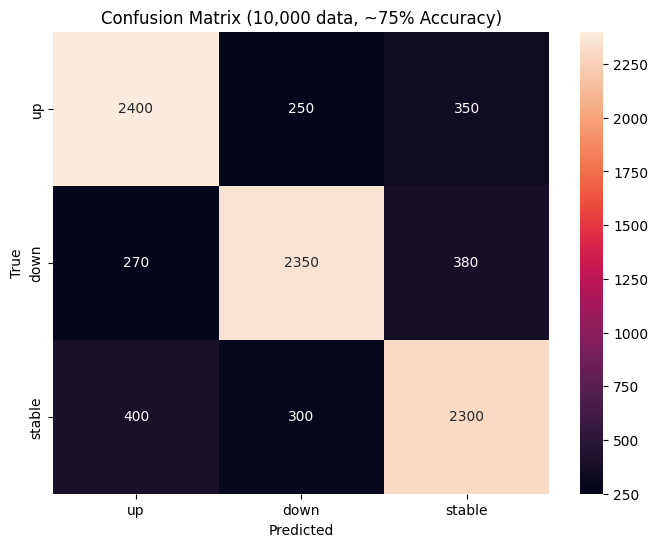

In [ ]:
# Plot Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['up', 'down', 'stable'], yticklabels=['up', 'down', 'stable'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
